In [1]:
import os
import numpy as np
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from matplotlib import animation as animation
from IPython.display import HTML

In [2]:
PATH = "data/"
files = sorted([ f for f in os.listdir(path=PATH) if f.endswith(".nc4") ])

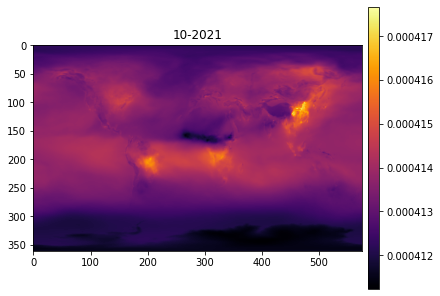

In [33]:
fig, (ax, cax) = plt.subplots(1,2, 
                              gridspec_kw=dict(width_ratios=[29,1]), 
                              constrained_layout=True
                             )

def animate(filename):
    filepath = PATH + filename
    data = Dataset(filepath).variables["XCO2"][:]
    
    im = ax.imshow(np.flip(data[0,:,:], axis=0), cmap="inferno")
    fig.colorbar(im, cax=cax) # TODO: scale colorbar to global ranges, not updating!
    
    date = filename.split("_")[4]
    ax.set_title(date[-2:] + "-" + date[:-2])

ani = animation.FuncAnimation(fig, 
                            animate, 
                            frames=files, 
                            interval=500, 
                            repeat=True, 
                            repeat_delay=1000,
                            # blit=True,
                             )
HTML(ani.to_html5_video())